In [1]:
import numpy as np
import pandas as pd 
import os
import sys
import random
from tqdm.notebook import tqdm

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

from mne.io import concatenate_raws, read_raw_edf
import antropy as ant
import mne
import mne_features
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.datasets import make_classification
import warnings

In [58]:
df_higuchi_final = pd.DataFrame(columns = raw.ch_names) # Higuchi
df_katz_final = pd.DataFrame(columns = raw.ch_names) # Katz
df_petrosian_final = pd.DataFrame(columns = raw.ch_names) # Petrosian
df_spec_ent_final = pd.DataFrame(columns = raw.ch_names)  # Spectral Entropy
df_perm_ent_final = pd.DataFrame(columns = raw.ch_names)  # Permutation Entropy

df_svd_ent_final = pd.DataFrame(columns = raw.ch_names)  # SVD Entropy
df_app_ent_final = pd.DataFrame(columns = raw.ch_names)  # Approximate Entropy
df_samp_ent_final = pd.DataFrame(columns = raw.ch_names)  # Sample Entropy
df_hjorth_final = pd.DataFrame(columns = raw.ch_names)  # Hjorth mobility and complexity
df_num_zerocross_final = pd.DataFrame(columns = raw.ch_names)  # Number of zero crossings
df_lziv_final = pd.DataFrame(columns = raw.ch_names)  # LZIV complexity
df_det_fluc_final = pd.DataFrame(columns = raw.ch_names)  # Detrended Fluctuation

## Looping through the files

In [3]:
os_path = "C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/Dataset 2/derivatives/"
subject = 'sub-001'
if (os.path.exists(f"{os_path}{subject}")):
    print('Yes')

Yes


In [3]:
filenames_list = os.listdir(f"{os_path}")
print(filenames_list)

['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 'sub-011', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-016', 'sub-017', 'sub-018', 'sub-019', 'sub-020', 'sub-021', 'sub-022', 'sub-023', 'sub-024', 'sub-025', 'sub-026', 'sub-027', 'sub-028', 'sub-029', 'sub-030', 'sub-031', 'sub-032', 'sub-033', 'sub-034', 'sub-035', 'sub-036', 'sub-037', 'sub-038', 'sub-039', 'sub-040', 'sub-041', 'sub-042', 'sub-043', 'sub-044', 'sub-045', 'sub-046', 'sub-047', 'sub-048', 'sub-049', 'sub-050', 'sub-051', 'sub-052', 'sub-053', 'sub-054', 'sub-055', 'sub-056', 'sub-057', 'sub-058', 'sub-059', 'sub-060', 'sub-061', 'sub-062', 'sub-063', 'sub-064', 'sub-065', 'sub-066', 'sub-067', 'sub-068', 'sub-069', 'sub-070', 'sub-071', 'sub-072', 'sub-073', 'sub-074', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 'sub-081', 'sub-082', 'sub-083', 'sub-084', 'sub-085', 'sub-086', 'sub-087', 'sub-088']


In [4]:
.9*500

450.0

In [5]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

subject = 'sub-001'
path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/Dataset 2/derivatives/{subject}/eeg/"
filename = f"{subject}_task-eyesclosed_eeg.set"
EEG_data = mne.io.read_raw_eeglab(f"{path}{filename}", preload=True)
raw = EEG_data

df_higuchi_final = pd.DataFrame(columns = raw.ch_names) # Higuchi
df_katz_final = pd.DataFrame(columns = raw.ch_names) # Katz
df_petrosian_final = pd.DataFrame(columns = raw.ch_names) # Petrosian
df_spec_ent_final = pd.DataFrame(columns = raw.ch_names)  # Spectral Entropy
df_perm_ent_final = pd.DataFrame(columns = raw.ch_names)  # Permutation Entropy

df_svd_ent_final = pd.DataFrame(columns = raw.ch_names)  # SVD Entropy
df_app_ent_final = pd.DataFrame(columns = raw.ch_names)  # Approximate Entropy
df_samp_ent_final = pd.DataFrame(columns = raw.ch_names)  # Sample Entropy
df_hjorth_final = pd.DataFrame(columns = raw.ch_names)  # Hjorth mobility and complexity
df_num_zerocross_final = pd.DataFrame(columns = raw.ch_names)  # Number of zero crossings
df_lziv_final = pd.DataFrame(columns = raw.ch_names)  # LZIV complexity
df_det_fluc_final = pd.DataFrame(columns = raw.ch_names)  # Detrended Fluctuation

for subject in tqdm(filenames_list):

    path_eeg = f"{os_path}{subject}/eeg/{subject}_task-eyesclosed_eeg.set"
    tqdm.write(f"{subject} started", end="\r")
    sys.stdout.flush()

    # import EEG file
    EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)
    low_freq, high_freq = 1.0, 40.0 # values in Hz
    raw = EEG_data.copy().filter(low_freq, high_freq, n_jobs=4, verbose='ERROR')

    std_montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(std_montage)

    xRaw = raw.get_data()
    tqdm.write(f"Length of EEG: {len(xRaw[0])/500.0}", end="\r")
    sys.stdout.flush()

    # Calculating Fractal Dimensions
    tqdm.write(f"Calculating Fractal Dimensions for {subject}", end='\r')
    sys.stdout.flush()
    #len(x_raw)
    df_higuchi = pd.DataFrame(columns = raw.ch_names) # Higuchi
    df_katz = pd.DataFrame(columns = raw.ch_names) # Katz
    df_petrosian = pd.DataFrame(columns = raw.ch_names) # Petrosian
    df_spec_ent = pd.DataFrame(columns = raw.ch_names)  # Spectral Entropy
    df_perm_ent = pd.DataFrame(columns = raw.ch_names)  # Permutation Entropy

    df_svd_ent = pd.DataFrame(columns = raw.ch_names)  # SVD Entropy
    df_app_ent = pd.DataFrame(columns = raw.ch_names)  # Approximate Entropy
    df_samp_ent = pd.DataFrame(columns = raw.ch_names)  # Sample Entropy
    df_hjorth = pd.DataFrame(columns = raw.ch_names)  # Hjorth mobility and complexity
    df_num_zerocross = pd.DataFrame(columns = raw.ch_names)  # Number of zero crossings
    df_lziv = pd.DataFrame(columns = raw.ch_names)  # LZIV complexity
    df_det_fluc = pd.DataFrame(columns = raw.ch_names)  # Detrended Fluctuation


    channel_no=0
    for row in xRaw: #row === channel_no.
        
        hig_channel_series = []
        katz_channel_series = []
        petrosian_channel_series = []
        spec_ent_channel_series = []
        perm_ent_channel_series = []

        df_svd_ent_channel_series = []
        df_app_ent_channel_series = []
        df_samp_ent_channel_series = []
        df_hjorth_channel_series = []
        df_num_zerocross_channel_series = []
        df_lziv_channel_series = []
        df_det_fluc_channel_series = []
        
        for i in range(500,len(xRaw[0]),50):
            hig_channel_series.append(ant.higuchi_fd(row[i-500:i]))
            katz_channel_series.append(ant.katz_fd(row[i-500:i]))
            petrosian_channel_series.append(ant.petrosian_fd(row[i-500:i]))
            spec_ent_channel_series.append(ant.spectral_entropy(row[i-500:i], sf=1000, method='welch', normalize=True))
            perm_ent_channel_series.append(ant.perm_entropy(row[i-500:i], normalize=True))

            df_svd_ent_channel_series.append(ant.svd_entropy(row[i-500:i], normalize=True))
            df_app_ent_channel_series.append(ant.app_entropy(row[i-500:i]))
            df_samp_ent_channel_series.append(ant.sample_entropy(row[i-500:i]))
            df_hjorth_channel_series.append(ant.hjorth_params(row[i-500:i]))
            df_num_zerocross_channel_series.append(ant.num_zerocross(row[i-500:i]))
            df_lziv_channel_series.append(ant.lziv_complexity(row[i-500:i]))
            df_det_fluc_channel_series.append(ant.detrended_fluctuation(row[i-500:i]))


            
        df_higuchi.iloc[:,channel_no] = hig_channel_series
        df_katz.iloc[:,channel_no] = katz_channel_series
        df_petrosian.iloc[:,channel_no] = petrosian_channel_series
        df_spec_ent.iloc[:,channel_no] = spec_ent_channel_series
        df_perm_ent.iloc[:,channel_no] = perm_ent_channel_series

        df_svd_ent.iloc[:,channel_no] = df_svd_ent_channel_series
        df_app_ent.iloc[:,channel_no] = df_app_ent_channel_series
        df_samp_ent.iloc[:,channel_no] = df_samp_ent_channel_series
        df_hjorth.iloc[:,channel_no] = df_hjorth_channel_series
        df_num_zerocross.iloc[:,channel_no] = df_num_zerocross_channel_series
        df_lziv.iloc[:,channel_no] = df_lziv_channel_series
        df_det_fluc.iloc[:,channel_no] = df_det_fluc_channel_series
        
        #print(len(channel_series))
        channel_no += 1
    
    # Adding subject number to the dataframe
    subject_num = int(subject.split('-')[1])

    df_higuchi['subject'] = subject_num
    df_katz['subject'] = subject_num
    df_petrosian['subject'] = subject_num
    df_spec_ent['subject'] = subject_num
    df_perm_ent['subject'] = subject_num

    df_svd_ent['subject'] = subject_num
    df_app_ent['subject'] = subject_num
    df_samp_ent['subject'] = subject_num
    df_hjorth['subject'] = subject_num
    df_num_zerocross['subject'] = subject_num
    df_lziv['subject'] = subject_num
    df_det_fluc['subject'] = subject_num


    df_higuchi_final = df_higuchi_final.append(df_higuchi)
    df_katz_final = df_katz_final.append(df_katz)
    df_petrosian_final = df_petrosian_final.append(df_petrosian)
    df_spec_ent_final = df_spec_ent_final.append(df_spec_ent)
    df_perm_ent_final = df_perm_ent_final.append(df_perm_ent)

    df_svd_ent_final = df_svd_ent_final.append(df_svd_ent)
    df_app_ent_final = df_app_ent_final.append(df_app_ent)
    df_samp_ent_final = df_samp_ent_final.append(df_samp_ent)
    df_hjorth_final = df_hjorth_final.append(df_hjorth)
    df_num_zerocross_final = df_num_zerocross_final.append(df_num_zerocross)
    df_lziv_final = df_lziv_final.append(df_lziv)
    df_det_fluc_final = df_det_fluc_final.append(df_det_fluc)

    tqdm.write(f"{subject} done", end='\r')


  0%|          | 0/88 [00:00<?, ?it/s]

## Multithreading Function

In [4]:
import os
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

def func_feature_extr(method):

    def feature_extr(subject):
        warnings.filterwarnings("ignore", category=FutureWarning)
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        os_path = "C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/Dataset 2/derivatives/"
        path_eeg = f"{os_path}{subject}/eeg/{subject}_task-eyesclosed_eeg.set"
        print(f"{subject} started")
        #sys.stdout.flush()

        # import EEG file
        EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)
        low_freq, high_freq = 1.0, 40.0 # values in Hz
        raw = EEG_data.copy().filter(low_freq, high_freq, n_jobs=4, verbose='ERROR')

        std_montage = mne.channels.make_standard_montage('standard_1020')
        raw.set_montage(std_montage)

        xRaw = raw.get_data()

        df_higuchi = pd.DataFrame(columns = raw.ch_names) # Higuchi


        channel_no=0
        for row in xRaw: #row === channel_no.
            hig_channel_series = []
        
            for i in range(500,len(xRaw[0]),50):
                    if(method == 'higuchi'):
                        hig_channel_series.append(ant.higuchi_fd(row[i-500:i]))
                    elif(method == 'katz'):
                        hig_channel_series.append(ant.katz_fd(row[i-500:i]))
                    elif(method == 'petrosian'):
                        hig_channel_series.append(ant.petrosian_fd(row[i-500:i]))
                    elif(method == 'spec_ent'):
                        hig_channel_series.append(ant.spectral_entropy(row[i-500:i], sf=500, method='welch', normalize=True))
                    elif(method == 'perm_ent'):
                        hig_channel_series.append(ant.permutation_entropy(row[i-500:i], normalize=True))
                    elif(method == 'svd_ent'):
                        hig_channel_series.append(ant.svd_entropy(row[i-500:i], normalize=True))
                    elif(method == 'app_ent'):
                        hig_channel_series.append(ant.app_entropy(row[i-500:i]))
                    elif(method == 'samp_ent'):
                        hig_channel_series.append(ant.sample_entropy(row[i-500:i]))
                    elif(method == 'hjorth'):
                        hig_channel_series.append(ant.hjorth_params(row[i-500:i]))
                    elif(method == 'num_zerocross'):
                        hig_channel_series.append(ant.num_zerocross(row[i-500:i]))
                    elif(method == 'lziv'):
                        hig_channel_series.append(ant.lziv_complexity(row[i-500:i]))
                    else:
                        hig_channel_series.append(ant.detrended_fluctuation(row[i-500:i]))
                    


            df_higuchi.iloc[:,channel_no] = hig_channel_series
            channel_no += 1

        # Adding subject number to the dataframe
        subject_num = int(subject.split('-')[1])

        df_higuchi['subject'] = subject_num
        
        return df_higuchi

    # Get the list of file paths
    os_path = "C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/Dataset 2/derivatives/"

    filenames_list = os.listdir(f"{os_path}")

    # Initialize an empty DataFrame for the final result
    final_df = pd.DataFrame()

    # Use ThreadPoolExecutor for parallel processing
    with ThreadPoolExecutor() as executor:
        processed_dfs = list(executor.map(feature_extr, filenames_list))

    # Concatenate all the processed DataFrames into the final DataFrame
    final_df = pd.concat(processed_dfs, ignore_index=True)

    return final_df


In [5]:
# Higuchi Final Table
df_higuchi_final = func_feature_extr('higuchi')
print("Higuchi Done\n")

# Petrosian Final Table
df_petrosian_final = func_feature_extr('petrosian')
print("Petrosian Done\n")

# SVD Entropy Final Table
df_svd_ent_final = func_feature_extr('svd_ent')
print("SVD Entropy Done\n")

sub-001 startedsub-002 started

sub-003 started
sub-004 started
sub-005 started
sub-006 started
sub-007 started
sub-008 started
sub-009 started
sub-010 started
sub-011 startedsub-012 started

sub-013 started
sub-014 started
sub-015 started
sub-016 started
sub-017 started
sub-018 started
sub-019 started
sub-020 started
sub-021 started
sub-022 started
sub-023 started
sub-024 started
sub-025 started
sub-026 started
sub-027 started
sub-028 started
sub-029 started
sub-030 started
sub-031 started
sub-032 started
sub-033 started
sub-034 started
sub-035 started
sub-036 started
sub-037 started
sub-038 started
sub-039 started
sub-040 started
sub-041 started
sub-042 started
sub-043 started
sub-044 started
sub-045 started
sub-046 started
sub-047 started
sub-048 started
sub-049 started
sub-050 started
sub-051 started
sub-052 started
sub-053 started
sub-054 started
sub-055 started
sub-056 started
sub-057 started
sub-058 started
sub-059 started
sub-060 started
sub-061 started
sub-062 started
sub-063 

In [6]:
# Number of Zero Crossings Final Table
df_num_zerocross_final = func_feature_extr('num_zerocross')
print("Num Zero Cross Done\n")

# Detrended Fluctuation Final Table
df_det_fluc_final = func_feature_extr('det_fluc')
print("Det Fluc Done\n")

# Hjorth Final Table
df_hjorth_final = func_feature_extr('hjorth')
print("Hjorth Done\n")

# Approximate Entropy Final Table
# df_app_ent_final = func_feature_extr('app_ent')
# print("App Entropy Done\n")


sub-001 startedsub-002 started
sub-003 started

sub-004 started
sub-005 started
sub-006 started
sub-007 startedsub-008 startedsub-009 started


sub-010 startedsub-011 started
sub-012 started
sub-013 started

sub-014 startedsub-015 started

sub-016 startedsub-017 started
sub-018 startedsub-019 started


sub-020 started
sub-021 started
sub-022 started
sub-023 started
sub-024 started
sub-025 started
sub-026 started
sub-027 started
sub-028 started
sub-029 started
sub-030 started
sub-031 started
sub-032 started
sub-033 started
sub-034 started
sub-035 started
sub-036 started
sub-037 started
sub-038 started
sub-039 started
sub-040 started
sub-041 started
sub-042 started
sub-043 started
sub-044 started
sub-045 started
sub-046 started
sub-047 started
sub-048 started
sub-049 started
sub-050 started
sub-051 started
sub-052 started
sub-053 started
sub-054 started
sub-055 started
sub-056 started
sub-057 started
sub-058 started
sub-059 started
sub-060 started
sub-061 started
sub-062 started
sub-063 

In [140]:
df_num_zerocross_final

Fp1 Fp2  F3  F4  C3  C4  P3  P4  O1  O2  F7  F8  T3  T4  T5  T6  Fz  Cz  \
0     14  14  20  19  18  14  14  16  16  14  14  10  18  22  14  12  14  13   
1      8  12  16  16  10  10   6  11   8  10  14  14  12  18   8   8  10   8   
2      6  10  16  12  10  12   8  10  12  14  12  20  12  18  10  10  10  12   
3     12  10  12   8  10  10   8   7  12  10   8  10  12  14  10  12   8  10   
4     21  17  19  17  23  17  15  13  17  15  15  19  15  19  15  15  15  15   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
1193  12  12  10  10   6   6   4   4   4   6  10  10   8   6   6   4   8   4   
1194  14  10  10  10   4   6   4   5   5   7   8   8   6   4   4   6  10   4   
1195   6   2   4   4   2   2   4   6   4   8   2   2   2   2   4   6   4   2   
1196   7   7   3   3   5   3   5   8   3  10   5   3   3   7   9   7   3   5   
1197   7   7   5   5   9   3   3   5   3   7   5   9   3   7   9   5   3   5   

      Pz  subject  
0     14      1.0  
1      6      1.0  
2     10      1.0  
3     10      1.0  
4     13      1.0  
...   ..      ...  
1193   4      1.0  
1194   5      1.0  
1195   6      1.0  
1196   4      1.0  
1197   1      1.0  

[1198 rows x 20 columns]

In [7]:
df_higuchi_final.to_csv("C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/higuchi_90pct.csv", index=False)
df_petrosian_final.to_csv("C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/petrosian_90pct.csv", index=False)
df_svd_ent_final.to_csv("C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/svd_ent_90pct.csv", index=False)
df_num_zerocross_final.to_csv("C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/num_zerocross_90pct.csv", index=False)
df_det_fluc_final.to_csv("C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/det_fluc_90pct.csv", index=False)
df_hjorth_final.to_csv("C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/hjorth_90pct.csv", index=False)


In [2]:
from matplotlib import pyplot as plt
# increase the size of the graph

def plot_importance(model):
    fig, ax = plt.subplots(figsize=(5,5))
    importance_type = 'gain'  # Specify importance type

    importance = model.get_booster().get_score(importance_type=importance_type)

    # Sort the features by importance score
    sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

    # Extract the feature names and importance scores
    feature_names = [x[0] for x in sorted_importance]
    importances = [x[1] for x in sorted_importance]

    # Create a horizontal bar graph of feature importances
    plt.barh(feature_names, importances)

    # Add labels and title to the graph
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title("Feature Importance using '{0}' method".format(importance_type))

    importances1 = list(importance.values())
    fig, ax1 = plt.subplots(figsize=(4,4))
    cnorm = TwoSlopeNorm(vmin=min(importances1), vcenter=(min(importances1) + max(importances1))/2, vmax=max(importances1))
    mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax1)

    # Show the graph
    plt.show()
    return list(importance.values())


def et_plot_importance(et, X_train):
    importances = et.feature_importances_
    #sorted_indices = np.argsort(importances)[::-1]

    fig, ax = plt.subplots(figsize=(5,5))
    sorted_indices = np.argsort(importances)[::-1]
    plt.title('Feature Importance')
    plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
    plt.tight_layout()

    importances1 = importances
    fig, ax1 = plt.subplots(figsize=(3,3))
    cnorm = TwoSlopeNorm(vmin=min(importances1), vcenter=(min(importances1) + max(importances1))/2, vmax=max(importances1))
    mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax1, show_names=True)
    plt.show()

In [3]:
def assign_Y(value):
    if (value >= 1.0 and value <= 36.0):
        return 1.0
    elif (value >= 37.0 and value <= 65.0):
        return 2.0
    else:
        return 3.0

## Machine Learning <br>
## 1. Higuchi

In [10]:
from pycaret.classification import *

In [11]:
src_filename = "higuchi_90pct.csv"
src_path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/{src_filename}"
hfd = pd.read_csv(src_path)
hfd_ml = hfd.copy()
hfd_ml

Fp1       Fp2        F3        F4        C3        C4        P3  \
0       1.245382  1.247795  1.212072  1.291242  1.151684  1.183958  1.112419   
1       1.237085  1.248073  1.219776  1.293584  1.169504  1.180190  1.109744   
2       1.230433  1.246673  1.212713  1.300858  1.165498  1.183540  1.118260   
3       1.249405  1.255746  1.215111  1.301343  1.158474  1.170867  1.104555   
4       1.264931  1.262768  1.221203  1.304792  1.157801  1.188687  1.094947   
...          ...       ...       ...       ...       ...       ...       ...   
697450  1.209416  1.219719  1.210405  1.208478  1.144774  1.156032  1.141135   
697451  1.203800  1.202805  1.209020  1.200727  1.156913  1.164234  1.150244   
697452  1.189518  1.185881  1.180547  1.180901  1.123154  1.141617  1.127629   
697453  1.196522  1.194802  1.188804  1.165982  1.136116  1.123353  1.133417   
697454  1.167851  1.167835  1.163532  1.171667  1.109545  1.109807  1.113618   

              P4        O1        O2        F7        F8        T3        T4  \
0       1.143296  1.163221  1.148315  1.184836  1.244224  1.196824  1.250657   
1       1.142338  1.149263  1.147996  1.181055  1.238942  1.200235  1.247455   
2       1.149641  1.152128  1.152138  1.189723  1.249859  1.216464  1.235727   
3       1.140468  1.136123  1.133774  1.203274  1.260519  1.191675  1.247532   
4       1.140907  1.130306  1.132298  1.199784  1.252438  1.199966  1.268948   
...          ...       ...       ...       ...       ...       ...       ...   
697450  1.154582  1.170321  1.165730  1.221262  1.211734  1.357220  1.289673   
697451  1.154632  1.175583  1.157813  1.220209  1.203838  1.347276  1.263270   
697452  1.142454  1.146496  1.142407  1.205815  1.187112  1.356353  1.257807   
697453  1.127016  1.152823  1.137391  1.208355  1.192723  1.355024  1.259575   
697454  1.116419  1.139035  1.124780  1.178285  1.168159  1.351438  1.266918   

              T5        T6        Fz        Cz        Pz  subject  
0       1.171727  1.163786  1.152476  1.126287  1.124646        1  
1       1.150482  1.155020  1.155638  1.123641  1.121449        1  
2       1.159459  1.171878  1.167118  1.130215  1.135318        1  
3       1.153417  1.158089  1.168183  1.133481  1.118594        1  
4       1.148063  1.160234  1.173307  1.132826  1.111585        1  
...          ...       ...       ...       ...       ...      ...  
697450  1.169198  1.155673  1.191618  1.167604  1.142726       88  
697451  1.175902  1.151798  1.187280  1.174190  1.142974       88  
697452  1.144548  1.163152  1.165187  1.150193  1.133036       88  
697453  1.150576  1.152008  1.176952  1.151249  1.127664       88  
697454  1.128292  1.153712  1.158460  1.129552  1.105558       88  

[697455 rows x 20 columns]

In [12]:
hfd_ml['Y'] = hfd_ml['subject'].apply(assign_Y)
hfd_ml.drop(['subject'], axis=1, inplace=True)
hfd_ml

Fp1       Fp2        F3        F4        C3        C4        P3  \
0       1.245382  1.247795  1.212072  1.291242  1.151684  1.183958  1.112419   
1       1.237085  1.248073  1.219776  1.293584  1.169504  1.180190  1.109744   
2       1.230433  1.246673  1.212713  1.300858  1.165498  1.183540  1.118260   
3       1.249405  1.255746  1.215111  1.301343  1.158474  1.170867  1.104555   
4       1.264931  1.262768  1.221203  1.304792  1.157801  1.188687  1.094947   
...          ...       ...       ...       ...       ...       ...       ...   
697450  1.209416  1.219719  1.210405  1.208478  1.144774  1.156032  1.141135   
697451  1.203800  1.202805  1.209020  1.200727  1.156913  1.164234  1.150244   
697452  1.189518  1.185881  1.180547  1.180901  1.123154  1.141617  1.127629   
697453  1.196522  1.194802  1.188804  1.165982  1.136116  1.123353  1.133417   
697454  1.167851  1.167835  1.163532  1.171667  1.109545  1.109807  1.113618   

              P4        O1        O2        F7        F8        T3        T4  \
0       1.143296  1.163221  1.148315  1.184836  1.244224  1.196824  1.250657   
1       1.142338  1.149263  1.147996  1.181055  1.238942  1.200235  1.247455   
2       1.149641  1.152128  1.152138  1.189723  1.249859  1.216464  1.235727   
3       1.140468  1.136123  1.133774  1.203274  1.260519  1.191675  1.247532   
4       1.140907  1.130306  1.132298  1.199784  1.252438  1.199966  1.268948   
...          ...       ...       ...       ...       ...       ...       ...   
697450  1.154582  1.170321  1.165730  1.221262  1.211734  1.357220  1.289673   
697451  1.154632  1.175583  1.157813  1.220209  1.203838  1.347276  1.263270   
697452  1.142454  1.146496  1.142407  1.205815  1.187112  1.356353  1.257807   
697453  1.127016  1.152823  1.137391  1.208355  1.192723  1.355024  1.259575   
697454  1.116419  1.139035  1.124780  1.178285  1.168159  1.351438  1.266918   

              T5        T6        Fz        Cz        Pz    Y  
0       1.171727  1.163786  1.152476  1.126287  1.124646  1.0  
1       1.150482  1.155020  1.155638  1.123641  1.121449  1.0  
2       1.159459  1.171878  1.167118  1.130215  1.135318  1.0  
3       1.153417  1.158089  1.168183  1.133481  1.118594  1.0  
4       1.148063  1.160234  1.173307  1.132826  1.111585  1.0  
...          ...       ...       ...       ...       ...  ...  
697450  1.169198  1.155673  1.191618  1.167604  1.142726  3.0  
697451  1.175902  1.151798  1.187280  1.174190  1.142974  3.0  
697452  1.144548  1.163152  1.165187  1.150193  1.133036  3.0  
697453  1.150576  1.152008  1.176952  1.151249  1.127664  3.0  
697454  1.128292  1.153712  1.158460  1.129552  1.105558  3.0  

[697455 rows x 20 columns]

In [13]:
clf = setup(data=hfd_ml[hfd_ml['Y']!=1.0], target='Y', 
            session_id=123, 
            # feature_selection=True, feature_selection_threshold=0.9, feature_selection_method='boruta', 
            fix_imbalance=True
            )

In [14]:
knn_hfd = create_model('knn', fold=15)

In [15]:
et_hfd = create_model('et', fold=15)

In [16]:
xgb_hfd = create_model('xgboost', fold=15)

In [17]:
rf_hfd = create_model('rf', fold=15)

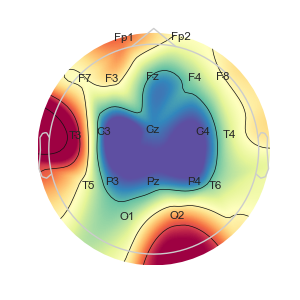

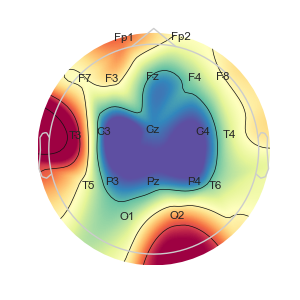

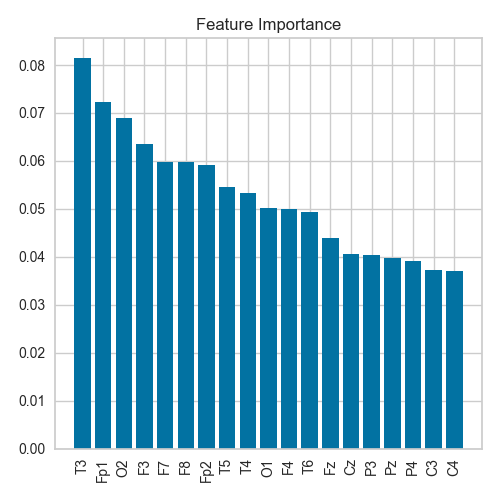

In [18]:
X = hfd_ml[hfd_ml['Y']!=1.0]
et_plot_importance(et_hfd, X.iloc[:, :-1])

## 2. SVD

In [23]:
src_filename = "svd_ent_90pct.csv"
src_path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/{src_filename}"
svd = pd.read_csv(src_path)
svd_ml = svd.copy()
svd_ml['Y'] = svd_ml['subject'].apply(assign_Y)
svd_ml.drop(['subject'], axis=1, inplace=True)

## Hold Out cross validation

In [24]:
df_input = svd_ml[svd_ml['Y']!=1.0]
df_input

Fp1       Fp2        F3        F4        C3        C4        P3  \
290981  0.136740  0.135478  0.131097  0.131080  0.134231  0.130652  0.161162   
290982  0.136345  0.134645  0.133134  0.129898  0.136594  0.128697  0.156281   
290983  0.150603  0.152502  0.150303  0.144725  0.147210  0.145162  0.168483   
290984  0.184879  0.187696  0.183815  0.176651  0.171369  0.180247  0.191574   
290985  0.189128  0.186180  0.187477  0.176851  0.173774  0.179223  0.193955   
...          ...       ...       ...       ...       ...       ...       ...   
697450  0.192046  0.194570  0.167874  0.187150  0.134754  0.154455  0.141886   
697451  0.203296  0.204972  0.176012  0.195439  0.141694  0.161422  0.152942   
697452  0.211877  0.212590  0.187064  0.200199  0.148502  0.166444  0.154540   
697453  0.221104  0.223954  0.197099  0.189289  0.158447  0.169831  0.158748   
697454  0.209712  0.213328  0.186916  0.181567  0.151330  0.162988  0.150274   

              P4        O1        O2        F7        F8        T3        T4  \
290981  0.146137  0.171664  0.171097  0.144480  0.147946  0.162821  0.141738   
290982  0.144123  0.171134  0.172532  0.145050  0.145624  0.158538  0.142296   
290983  0.163129  0.186269  0.187461  0.159288  0.164365  0.173705  0.158269   
290984  0.197079  0.218108  0.216322  0.187866  0.200932  0.194345  0.188713   
290985  0.198158  0.221582  0.217804  0.188359  0.196964  0.199517  0.193534   
...          ...       ...       ...       ...       ...       ...       ...   
697450  0.171915  0.177651  0.173614  0.217917  0.197141  0.422067  0.257403   
697451  0.182628  0.190506  0.186579  0.230473  0.207889  0.436200  0.267825   
697452  0.190281  0.189521  0.189980  0.236256  0.214975  0.429522  0.281642   
697453  0.193897  0.193284  0.192136  0.242996  0.228182  0.431575  0.287206   
697454  0.185987  0.184481  0.184615  0.228221  0.219228  0.411361  0.280977   

              T5        T6        Fz        Cz        Pz    Y  
290981  0.173893  0.153898  0.134222  0.144388  0.139914  2.0  
290982  0.170930  0.155006  0.135160  0.141992  0.140191  2.0  
290983  0.185776  0.175220  0.148656  0.152697  0.153363  2.0  
290984  0.210081  0.205944  0.180182  0.177740  0.181402  2.0  
290985  0.212167  0.209570  0.180821  0.176858  0.186312  2.0  
...          ...       ...       ...       ...       ...  ...  
697450  0.180467  0.182049  0.151054  0.140196  0.157318  3.0  
697451  0.192534  0.194584  0.159734  0.150921  0.170252  3.0  
697452  0.192348  0.214951  0.165865  0.155908  0.173605  3.0  
697453  0.192661  0.225365  0.181966  0.165167  0.177169  3.0  
697454  0.177341  0.221213  0.174998  0.157705  0.166105  3.0  

[406474 rows x 20 columns]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_input.iloc[:, :-1], df_input.iloc[:, -1], test_size=0.2, random_state=123)

In [26]:
clf_input = pd.concat([X_train, y_train], axis=1)
clf_input

Fp1       Fp2        F3        F4        C3        C4        P3  \
549728  0.285711  0.199767  0.238674  0.234186  0.192173  0.194951  0.192992   
515850  0.175170  0.172642  0.173863  0.174067  0.158921  0.156662  0.186778   
658426  0.222061  0.215169  0.238170  0.210777  0.190782  0.181413  0.189035   
473312  0.170301  0.188379  0.173840  0.206656  0.154985  0.168629  0.175326   
562071  0.224025  0.227269  0.230079  0.228667  0.202980  0.209732  0.221089   
...          ...       ...       ...       ...       ...       ...       ...   
483457  0.182587  0.193790  0.173940  0.171900  0.171127  0.174209  0.187921   
308711  0.199701  0.211187  0.211797  0.252724  0.180808  0.198070  0.197623   
319011  0.148761  0.158366  0.154375  0.140537  0.216490  0.217975  0.261184   
568850  0.204670  0.199777  0.187552  0.192590  0.190638  0.171983  0.187595   
540323  0.374470  0.324835  0.377512  0.301717  0.217658  0.212850  0.232370   

              P4        O1        O2        F7        F8        T3        T4  \
549728  0.182636  0.196506  0.194652  0.249328  0.219825  0.228909  0.209730   
515850  0.183458  0.220789  0.215504  0.174761  0.180124  0.180620  0.174049   
658426  0.185630  0.194150  0.194811  0.203029  0.188674  0.207103  0.208110   
473312  0.185403  0.206253  0.212737  0.185847  0.192028  0.257086  0.199048   
562071  0.218923  0.227535  0.231063  0.235982  0.235305  0.246271  0.282241   
...          ...       ...       ...       ...       ...       ...       ...   
483457  0.197307  0.209019  0.220931  0.173692  0.193085  0.221706  0.192232   
308711  0.204249  0.213235  0.210604  0.216130  0.234660  0.205452  0.211240   
319011  0.240824  0.201670  0.223703  0.151056  0.116924  0.193824  0.143333   
568850  0.158903  0.176424  0.177384  0.207557  0.216447  0.200928  0.191421   
540323  0.218951  0.244923  0.226922  0.273921  0.313619  0.433791  0.500559   

              T5        T6        Fz        Cz        Pz    Y  
549728  0.199210  0.203503  0.201376  0.221304  0.199564  3.0  
515850  0.236336  0.180880  0.178333  0.197399  0.191736  2.0  
658426  0.199810  0.209692  0.181708  0.185384  0.185147  3.0  
473312  0.207956  0.221183  0.174664  0.161566  0.171718  2.0  
562071  0.224709  0.238727  0.214034  0.219901  0.216212  3.0  
...          ...       ...       ...       ...       ...  ...  
483457  0.207677  0.219153  0.168488  0.176574  0.187952  2.0  
308711  0.219495  0.216773  0.206263  0.198524  0.202064  2.0  
319011  0.232016  0.152723  0.206847  0.217828  0.251264  2.0  
568850  0.190172  0.183837  0.198095  0.196527  0.156412  3.0  
540323  0.287210  0.285738  0.241291  0.202766  0.216624  3.0  

[325179 rows x 20 columns]

In [27]:
clf = setup(
    data=clf_input,
    target='Y',
    fix_imbalance=True,
    feature_selection=True
)

In [28]:
knn_hold = create_model('knn', fold=15)

In [29]:
X.value_counts()

Fp1       Fp2       F3        F4        C3        C4        P3        P4        O1        O2        F7        F8        T3        T4        T5        T6        Fz        Cz        Pz        Y  
1.035098  1.064133  1.067642  1.079883  1.093983  1.108934  1.114630  1.086906  1.108343  1.095236  1.032033  1.053628  1.030086  1.076251  1.078217  1.096871  1.093655  1.117832  1.103581  2.0    1
1.183722  1.205213  1.182514  1.170092  1.184764  1.197288  1.155421  1.152619  1.089204  1.091159  1.193353  1.167153  1.186360  1.261469  1.118201  1.114754  1.154017  1.154619  1.121673  2.0    1
1.183721  1.184314  1.139252  1.169835  1.094259  1.139637  1.092137  1.102335  1.087206  1.080441  1.141604  1.142595  1.215464  1.199459  1.110124  1.098389  1.146864  1.116023  1.088825  3.0    1
1.183720  1.170115  1.184628  1.160636  1.171021  1.154967  1.140851  1.122613  1.131255  1.106313  1.187336  1.167909  1.225830  1.225118  1.109331  1.093803  1.157434  1.168595  1.176265  3.0    1
          

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
y_pred = knn_hold.predict(X_test)


In [32]:
accuracy = accuracy_score(y_test, y_pred)
# print(classification_report(y_test, y_pred))
accuracy

0.0

In [33]:
new_data = X_test
new_data

Fp1       Fp2        F3        F4        C3        C4        P3  \
515516  0.186901  0.183164  0.181797  0.169208  0.169190  0.155717  0.215132   
600438  0.282133  0.174295  0.219181  0.173205  0.154237  0.161041  0.192030   
338321  0.155749  0.157595  0.164520  0.157495  0.156435  0.154825  0.172035   
676588  0.382944  0.372506  0.298950  0.355135  0.284901  0.290049  0.292698   
557110  0.157810  0.151366  0.220577  0.155719  0.166747  0.150851  0.176447   
...          ...       ...       ...       ...       ...       ...       ...   
688729  0.139982  0.137412  0.141496  0.154948  0.138795  0.147164  0.149439   
536151  0.177025  0.207366  0.181776  0.193441  0.169235  0.147016  0.148516   
586197  0.247964  0.241494  0.233009  0.234879  0.207899  0.188035  0.226216   
387725  0.338154  0.278124  0.226636  0.303934  0.183591  0.182170  0.215634   
648589  0.168162  0.179861  0.168059  0.181243  0.157969  0.172508  0.168267   

              P4        O1        O2        F7        F8        T3        T4  \
515516  0.185519  0.223017  0.233646  0.181006  0.190522  0.199294  0.194478   
600438  0.159852  0.215638  0.208501  0.173320  0.186706  0.195393  0.181870   
338321  0.170468  0.203068  0.202755  0.160504  0.164703  0.189062  0.184529   
676588  0.244544  0.298840  0.281599  0.330912  0.534204  0.333487  0.348416   
557110  0.158908  0.174530  0.172060  0.175987  0.151099  0.264649  0.170498   
...          ...       ...       ...       ...       ...       ...       ...   
688729  0.155412  0.165088  0.169307  0.145934  0.164621  0.189652  0.172643   
536151  0.146958  0.139774  0.144430  0.169748  0.170551  0.163847  0.160642   
586197  0.195864  0.253207  0.219170  0.241840  0.216966  0.272286  0.320723   
387725  0.193024  0.233968  0.229574  0.289243  0.294273  0.246701  0.213711   
648589  0.168494  0.172470  0.175202  0.165935  0.193866  0.172936  0.184306   

              T5        T6        Fz        Cz        Pz  
515516  0.252186  0.217906  0.173712  0.167311  0.189358  
600438  0.207280  0.193176  0.212777  0.165982  0.185868  
338321  0.219760  0.197316  0.166768  0.165856  0.165934  
676588  0.329801  0.283547  0.222158  0.233086  0.260912  
557110  0.207892  0.191868  0.164375  0.157871  0.157837  
...          ...       ...       ...       ...       ...  
688729  0.183895  0.203298  0.145452  0.145098  0.149683  
536151  0.156649  0.140210  0.178812  0.164760  0.135274  
586197  0.249696  0.203559  0.214964  0.184771  0.205398  
387725  0.230774  0.220574  0.226689  0.174152  0.194983  
648589  0.169256  0.173964  0.171539  0.161853  0.163927  

[81295 rows x 19 columns]

In [34]:
predictions = predict_model(knn_hold, data=new_data)

In [35]:
predictions

Fp1       Fp2        F3        F4        C3        C4        P3  \
515516  0.186901  0.183164  0.181797  0.169208  0.169190  0.155717  0.215132   
600438  0.282133  0.174295  0.219181  0.173205  0.154237  0.161041  0.192030   
338321  0.155749  0.157595  0.164520  0.157495  0.156435  0.154825  0.172035   
676588  0.382944  0.372506  0.298950  0.355135  0.284901  0.290049  0.292698   
557110  0.157810  0.151366  0.220577  0.155719  0.166747  0.150851  0.176447   
...          ...       ...       ...       ...       ...       ...       ...   
688729  0.139982  0.137412  0.141496  0.154948  0.138795  0.147164  0.149439   
536151  0.177025  0.207366  0.181776  0.193441  0.169235  0.147016  0.148516   
586197  0.247964  0.241494  0.233009  0.234879  0.207899  0.188035  0.226216   
387725  0.338154  0.278124  0.226636  0.303934  0.183591  0.182170  0.215634   
648589  0.168162  0.179861  0.168059  0.181243  0.157969  0.172508  0.168267   

              P4        O1        O2  ...        F8        T3        T4  \
515516  0.185519  0.223017  0.233646  ...  0.190522  0.199294  0.194478   
600438  0.159852  0.215638  0.208501  ...  0.186706  0.195393  0.181870   
338321  0.170468  0.203068  0.202755  ...  0.164703  0.189062  0.184529   
676588  0.244544  0.298840  0.281599  ...  0.534204  0.333487  0.348416   
557110  0.158908  0.174530  0.172060  ...  0.151099  0.264649  0.170498   
...          ...       ...       ...  ...       ...       ...       ...   
688729  0.155412  0.165088  0.169307  ...  0.164621  0.189652  0.172643   
536151  0.146958  0.139774  0.144430  ...  0.170551  0.163847  0.160642   
586197  0.195864  0.253207  0.219170  ...  0.216966  0.272286  0.320723   
387725  0.193024  0.233968  0.229574  ...  0.294273  0.246701  0.213711   
648589  0.168494  0.172470  0.175202  ...  0.193866  0.172936  0.184306   

              T5        T6        Fz        Cz        Pz  Label Score  
515516  0.252186  0.217906  0.173712  0.167311  0.189358    2.0   1.0  
600438  0.207280  0.193176  0.212777  0.165982  0.185868    3.0   1.0  
338321  0.219760  0.197316  0.166768  0.165856  0.165934    2.0   1.0  
676588  0.329801  0.283547  0.222158  0.233086  0.260912    3.0   1.0  
557110  0.207892  0.191868  0.164375  0.157871  0.157837    3.0   1.0  
...          ...       ...       ...       ...       ...    ...   ...  
688729  0.183895  0.203298  0.145452  0.145098  0.149683    3.0   0.8  
536151  0.156649  0.140210  0.178812  0.164760  0.135274    3.0   1.0  
586197  0.249696  0.203559  0.214964  0.184771  0.205398    3.0   1.0  
387725  0.230774  0.220574  0.226689  0.174152  0.194983    2.0   1.0  
648589  0.169256  0.173964  0.171539  0.161853  0.163927    3.0   1.0  

[81295 rows x 21 columns]

In [36]:
preds = predictions['Label'].astype(float)
preds

515516    2.0
600438    3.0
338321    2.0
676588    3.0
557110    3.0
         ... 
688729    3.0
536151    3.0
586197    3.0
387725    2.0
648589    3.0
Name: Label, Length: 81295, dtype: float64

In [37]:
accuracy_score(y_test, preds)

0.9363183467617935

In [38]:
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[44377  3718]
 [ 1459 31741]]
              precision    recall  f1-score   support

         2.0       0.97      0.92      0.94     48095
         3.0       0.90      0.96      0.92     33200

    accuracy                           0.94     81295
   macro avg       0.93      0.94      0.93     81295
weighted avg       0.94      0.94      0.94     81295



## Checking manually

In [39]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from numpy import mean, std
# import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
knn_manual = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn_manual, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.949 (0.001)


## Normal cross validation

In [40]:
clf = setup(
    data=svd_ml[svd_ml['Y']!=3.0],
    target='Y',
    fix_imbalance=True
)

In [22]:
compare_models(fold=15)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
knn = create_model('knn', fold=15)

In [42]:
tuned_knn = tune_model(knn, fold=15)

IntProgress(value=0, description='Processing: ', max=7)

Initiated  . . . . . . . . . . . . . . . . . .              13:49:50
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Empty DataFrame
Columns: [Fold, Accuracy, AUC, Recall, Prec., F1, Kappa, MCC]
Index: []

Fitting 15 folds for each of 10 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 23.3min


In [ ]:
et = create_model('et', fold=15)

In [ ]:
xgb = create_model('xgboost', fold=15)

In [ ]:
rf = create_model('rf', fold=15)

In [26]:
import pickle
with open("C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/FTD_SVD_KNN_90pct.pkl", 'wb') as files:
    pickle.dump(tuned_knn, files)

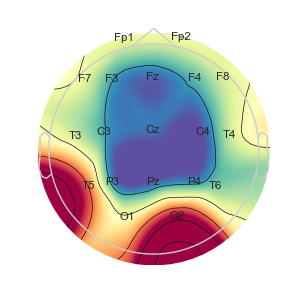

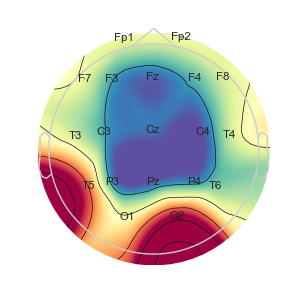

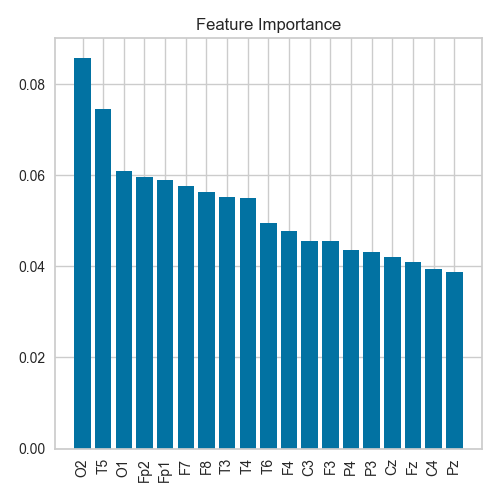

In [ ]:
X=svd_ml[svd_ml['Y']!=1.0]
et_plot_importance(et, X.iloc[:, :-1])

## 3. Num Zerocross

In [86]:
src_filename = "num_zerocross_90pct.csv"
src_path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/{src_filename}"
num_zerocross = pd.read_csv(src_path)
num_zerocross_ml = num_zerocross.copy()
num_zerocross_ml['Y'] = num_zerocross_ml['subject'].apply(assign_Y)
num_zerocross_ml.drop(['subject'], axis=1, inplace=True)

In [87]:
clf = setup(
    data=num_zerocross_ml[num_zerocross_ml['Y']!=3.0],
    target='Y',
    fix_imbalance=True
)

In [64]:
knn = create_model('knn', fold=15)

In [90]:
et = create_model('et', fold=15)

In [89]:
xgb = create_model('xgboost', fold=15)

In [88]:
rf = create_model('rf', fold=15)

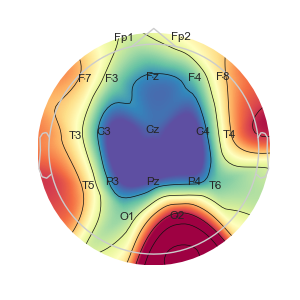

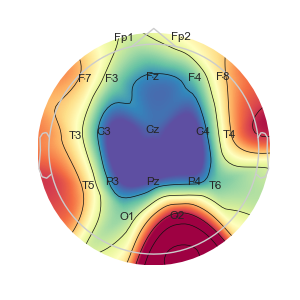

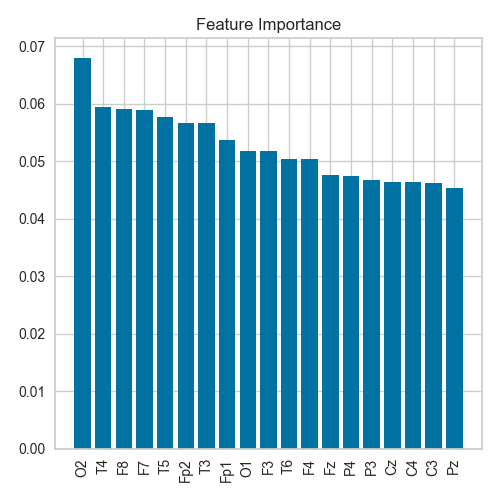

In [91]:
X=num_zerocross_ml[num_zerocross_ml['Y']!=3.0]
et_plot_importance(rf, X.iloc[:, :-1])

## 4. Detrended Fluctuation

In [69]:
src_filename = "det_fluc_90pct.csv"
src_path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/{src_filename}"
det_fluc = pd.read_csv(src_path)
det_fluc_ml = det_fluc.copy()
det_fluc_ml['Y'] = det_fluc_ml['subject'].apply(assign_Y)
det_fluc_ml.drop(['subject'], axis=1, inplace=True)

In [70]:
clf = setup(
    data=det_fluc_ml[det_fluc_ml['Y']!=3.0],
    target='Y',
    fix_imbalance=True
)

In [71]:
knn = create_model('knn', fold=15)

In [76]:
et = create_model('et', fold=15)

In [73]:
xgb = create_model('xgboost', fold=15)

In [75]:
rf = create_model('rf', fold=15)

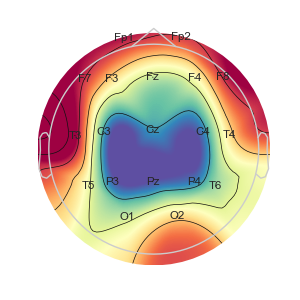

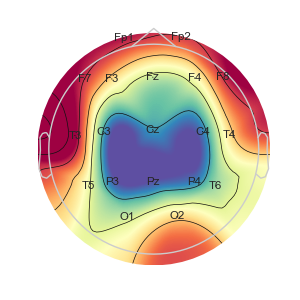

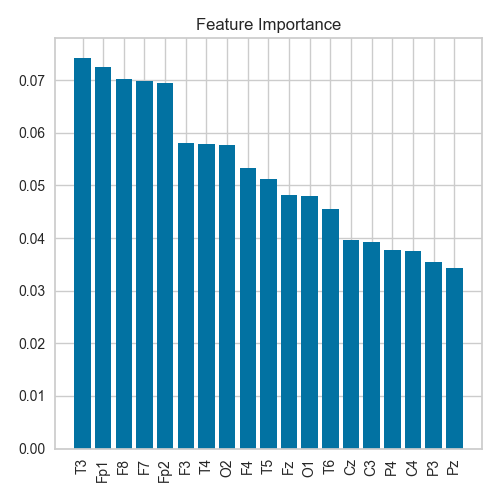

In [77]:
X=det_fluc_ml[det_fluc_ml['Y']!=3.0]
et_plot_importance(rf, X.iloc[:, :-1])

## Hjorth

In [74]:
src_filename = "hjorth_90pct.csv"
src_path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/{src_filename}"
hjorth = pd.read_csv(src_path)
hjorth_ml = hjorth.copy()
hjorth_ml['Y'] = hjorth_ml['subject'].apply(assign_Y)
hjorth_ml.drop(['subject'], axis=1, inplace=True)

In [78]:
hjorth_ml

Fp1  \
0        (0.08396628470468122, 4.503675397768219)   
1         (0.0708454280575853, 5.429265697125904)   
2       (0.06616485729642756, 5.8454485492433115)   
3         (0.06503153873928426, 6.14730269875871)   
4          (0.064811407322009, 6.299906061426073)   
...                                           ...   
697450      (0.0586281669798945, 6.2702727973467)   
697451   (0.06477310235171743, 5.566884671196246)   
697452  (0.07075890718106768, 5.0845513820271515)   
697453   (0.07818104231349667, 4.470355779087582)   
697454    (0.0687361968650394, 5.056440770985525)   

                                              Fp2  \
0        (0.07933741434654852, 4.968856900029781)   
1        (0.07304721941371577, 5.479737120877136)   
2        (0.07004122098436849, 5.787240312701734)   
3         (0.06908314822824987, 5.91391071043683)   
4        (0.06894299504872617, 5.987979398077668)   
...                                           ...   
697450  (0.059883897163101274, 6.015966663642833)   
697451   (0.06585041260968913, 5.354168513437708)   
697452   (0.07136738302470204, 4.902411478751527)   
697453   (0.07950635040042522, 4.365425502698088)   
697454   (0.07026159618225705, 4.913786508965202)   

                                               F3  \
0        (0.07864923542360573, 4.642514419823844)   
1        (0.07817311791417898, 4.936720620878916)   
2        (0.07564456239032952, 5.109615785060516)   
3         (0.0750557951011371, 5.135883203080197)   
4       (0.07454533609237017, 5.2155044307616665)   
...                                           ...   
697450   (0.04916363640323655, 7.556805668067742)   
697451  (0.05379067451303875, 6.5958135978859405)   
697452    (0.0606315431627973, 5.767874827429393)   
697453   (0.06777467222098592, 4.833871500198554)   
697454   (0.05928432402107999, 5.467993232085241)   

                                               F4  \
0       (0.11312925951571386, 3.7916362771844696)   
1        (0.10665476355705474, 4.046638103363254)   
2         (0.10652008090667739, 4.07866246886129)   
3        (0.10064612959934632, 4.327164244837257)   
4        (0.10115013413674617, 4.297843869917918)   
...                                           ...   
697450   (0.05726180573274472, 6.385497516361473)   
697451   (0.06255905074741748, 5.721987584452233)   
697452   (0.06666985708219038, 5.152109581131257)   
697453  (0.06337795989458594, 5.0666002960714795)   
697454   (0.05624009025373923, 5.818889532424265)   

                                               C3  \
0        (0.06738580869529348, 5.000408980079307)   
1        (0.06691650647155058, 5.235162090839423)   
2        (0.06536419457514718, 5.389245683862255)   
3       (0.06452417928206769, 5.4525360919812895)   
4        (0.06304166508538006, 5.571921924247265)   
...                                           ...   
697450   (0.03753146353661151, 8.440131081270122)   
697451   (0.04148077833725187, 7.074795358216911)   
697452   (0.04527961073072938, 6.551839742350896)   
697453  (0.050549063341614346, 5.579184405723775)   
697454   (0.04482686765170096, 6.183057084254685)   

                                               C4  \
0        (0.06394989952620653, 5.389810029765793)   
1          (0.062622932460328, 5.737294067904628)   
2        (0.06311176326856267, 5.793951613738584)   
3        (0.06147551914997781, 5.865063541332403)   
4       (0.06096040934151495, 5.9662813784112085)   
...                                           ...   
697450    (0.04505882134870527, 6.98134586337154)   
697451   (0.04926365058899729, 6.288519992969461)   
697452   (0.05311809142095853, 5.598780422723087)   
697453  (0.056617126053385446, 5.046691146983923)   
697454   (0.05060180654719083, 5.486999063538344)   

                                                P3  \
0         (0.06008920651116052, 4.930091664993406)   
1        (0.056431637296952525, 5.230709409505948)   
2        (0.055884513995444744, 5.338053723420023)   
3       

In [79]:
X1 = hjorth_ml.iloc[:, :-1].applymap(lambda x: (float(x.split(',')[0].split('(')[1]) + float(x.split(',')[1].split(')')[0]))/2)
X1 = pd.concat([X1, hjorth_ml.iloc[:, -1]], axis=1)
X1

Fp1       Fp2        F3        F4        C3        C4        P3  \
0       2.293821  2.524097  2.360582  1.952383  2.533897  2.726880  2.495090   
1       2.750056  2.776392  2.507447  2.076646  2.651039  2.899959  2.643571   
2       2.955807  2.928641  2.592630  2.092591  2.727305  2.928532  2.696969   
3       3.106167  2.991497  2.605469  2.213905  2.758530  2.963270  2.738433   
4       3.182359  3.028461  2.645025  2.199497  2.817482  3.013621  2.780334   
...          ...       ...       ...       ...       ...       ...       ...   
697450  3.164450  3.037925  3.802985  3.221380  4.238831  3.513202  3.855724   
697451  2.815829  2.710009  3.324802  2.892273  3.558138  3.168892  3.301988   
697452  2.577655  2.486889  2.914253  2.609390  3.298560  2.825949  3.171258   
697453  2.274268  2.222466  2.450823  2.564989  2.814867  2.551654  2.944953   
697454  2.562588  2.492024  2.763639  2.937565  3.113942  2.768800  3.296436   

              P4        O1        O2        F7        F8        T3        T4  \
0       2.659154  2.458074  2.417653  2.561678  2.248846  2.235656  2.542479   
1       2.856470  2.514314  2.551481  2.840887  2.273229  2.426517  2.580139   
2       2.912098  2.534207  2.534393  3.035213  2.238033  2.454731  2.677947   
3       2.967910  2.621535  2.542845  3.058797  2.197342  2.569702  2.614660   
4       3.148185  2.666725  2.693367  3.025313  2.148595  2.562990  2.618958   
...          ...       ...       ...       ...       ...       ...       ...   
697450  2.924780  3.112339  2.922589  2.749443  2.993968  1.233354  2.340248   
697451  2.572238  2.693616  2.509840  2.478427  2.703196  1.165048  2.094197   
697452  2.366058  2.578920  2.374575  2.315832  2.475714  1.192233  1.949510   
697453  2.258119  2.452556  2.330014  2.102104  2.182713  1.168611  1.911656   
697454  2.429310  2.723471  2.507109  2.396246  2.407771  1.294460  2.061782   

              T5        T6        Fz        Cz        Pz    Y  
0       2.411301  2.520986  2.783160  2.586030  2.527715  1.0  
1       2.426045  2.708613  2.936549  2.737053  2.738512  1.0  
2       2.468671  2.744138  3.098790  2.823714  2.775986  1.0  
3       2.549494  2.779871  3.098135  2.862357  2.800528  1.0  
4       2.547158  2.916278  3.166991  2.960836  2.910523  1.0  
...          ...       ...       ...       ...       ...  ...  
697450  3.101059  2.813640  4.058999  4.070804  3.238061  3.0  
697451  2.661993  2.499719  3.583991  3.521463  2.754338  3.0  
697452  2.576274  2.239287  3.212738  3.114558  2.572006  3.0  
697453  2.525513  1.994562  2.641293  2.681032  2.420528  3.0  
697454  2.851828  2.103733  2.951551  2.969456  2.732957  3.0  

[697455 rows x 20 columns]

In [80]:
clf = setup(
    data=X1[X1['Y']!=3.0],
    target='Y',
    fix_imbalance = True,
    normalize = True
)

In [81]:
knn = create_model('knn', fold=15)

In [82]:
et = create_model('et', fold=15)

In [83]:
rf = create_model('rf', fold=15)

In [84]:
xgb = create_model('xgboost', fold=15)

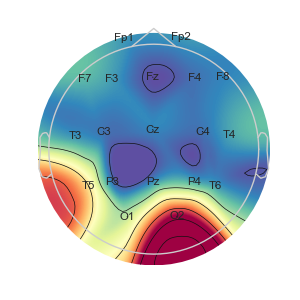

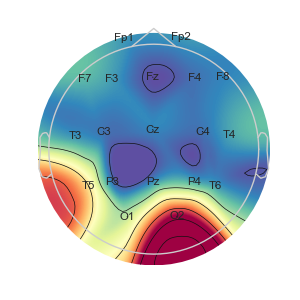

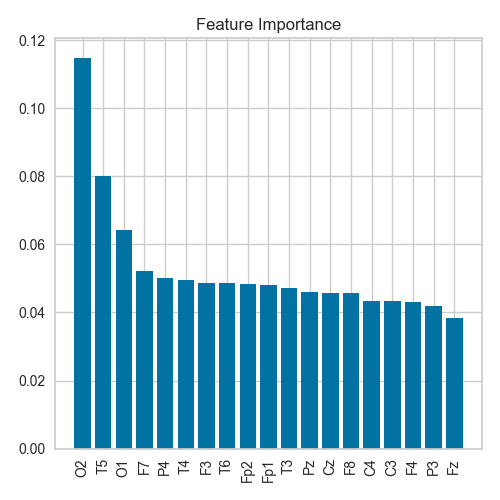

In [85]:
X=hjorth_ml[hjorth_ml['Y']!=3.0]
et_plot_importance(rf, X.iloc[:, :-1])

In [4]:
subject = 'sub-001'
path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/Dataset 2/derivatives/{subject}/eeg/"
filename = f"{subject}_task-eyesclosed_eeg.set"

In [5]:
EEG_data = mne.io.read_raw_eeglab(f"{path}{filename}", preload=True)
EEG_data

<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>

Using matplotlib as 2D backend.
Opening raw-browser...


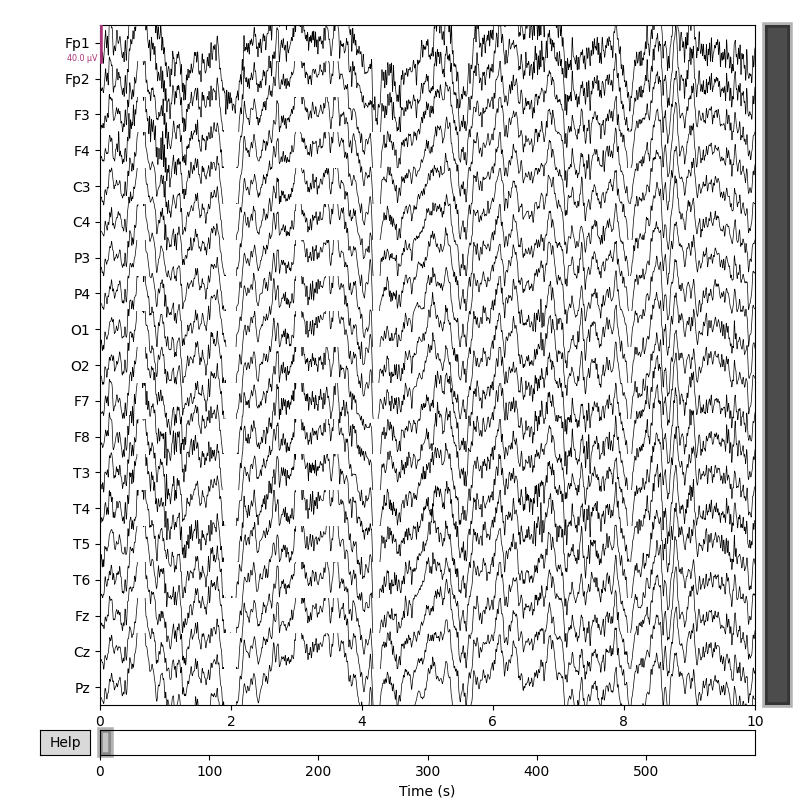

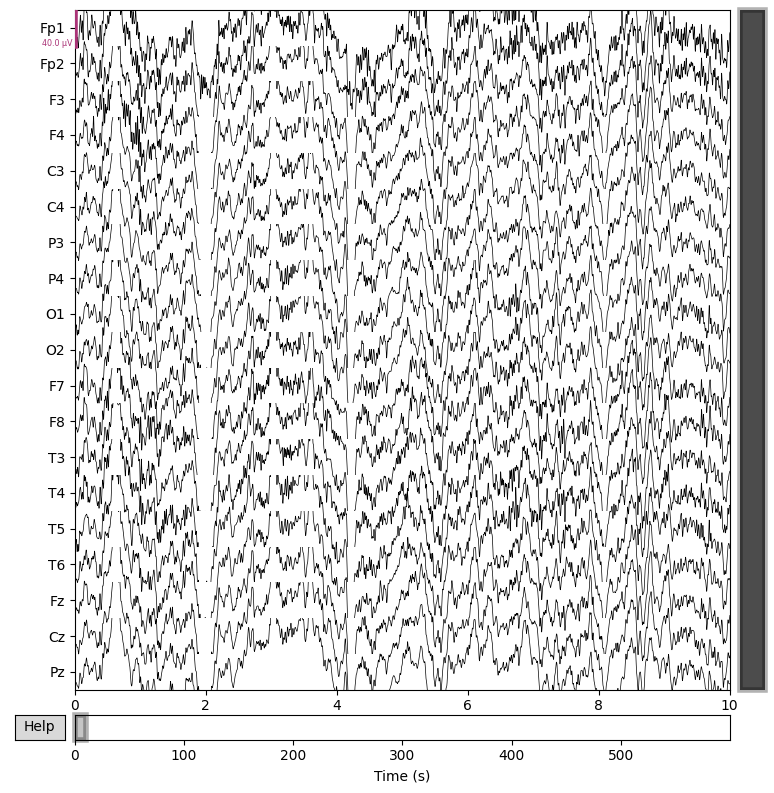

In [6]:
# enable matplotlib widgets for plotting
%matplotlib widget
EEG_data.plot()

In [7]:
low_freq, high_freq = 1.0, 40.0 # values in Hz
raw = EEG_data.copy().filter(low_freq, high_freq, n_jobs=4)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done  19 out of  19 | elapsed:    2.2s finished


Opening raw-browser...


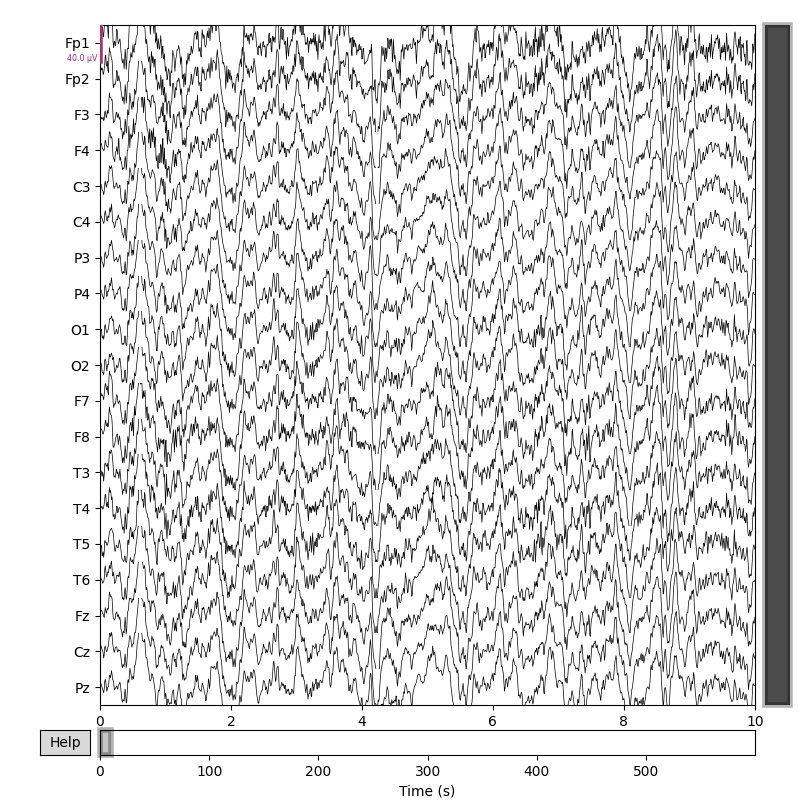

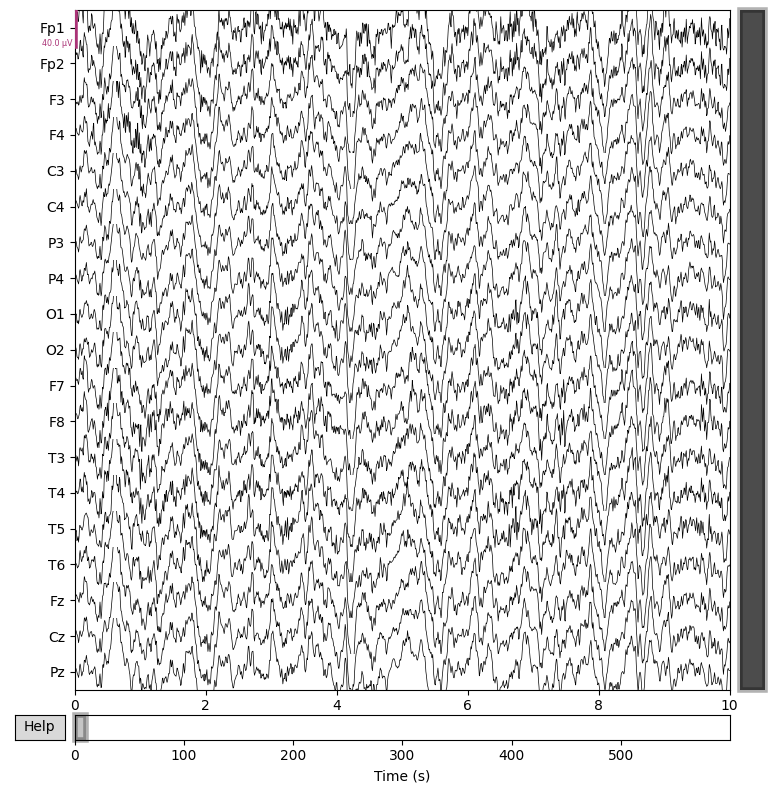

In [8]:
#raw.crop(tmax=500)
raw.plot()

In [9]:
std_montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(std_montage)

<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>

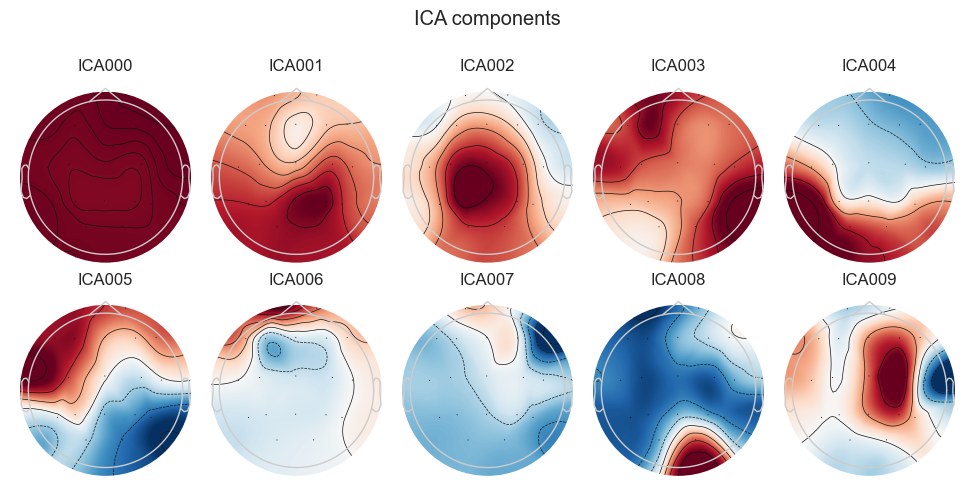

[<MNEFigure size 975x496 with 10 Axes>]

In [43]:
ica = mne.preprocessing.ICA(n_components=10, random_state=0)
ica.fit(raw.copy())
ica.plot_components(outlines='head')

In [44]:
500*300

150000

In [45]:
xRaw = raw.get_data()
len(xRaw[0])

299900

## Calculating Fractal Dimensions

In [122]:
#len(x_raw)
df_higuchi = pd.DataFrame(columns = raw.ch_names) # Higuchi
df_katz = pd.DataFrame(columns = raw.ch_names) # Katz
df_petrosian = pd.DataFrame(columns = raw.ch_names) # Petrosian
df_spec_ent = pd.DataFrame(columns = raw.ch_names)  # Spectral Entropy
df_perm_ent = pd.DataFrame(columns = raw.ch_names)  # Permutation Entropy

df_svd_ent = pd.DataFrame(columns = raw.ch_names)  # SVD Entropy
df_app_ent = pd.DataFrame(columns = raw.ch_names)  # Approximate Entropy
df_samp_ent = pd.DataFrame(columns = raw.ch_names)  # Sample Entropy
df_hjorth = pd.DataFrame(columns = raw.ch_names)  # Hjorth mobility and complexity
df_num_zerocross = pd.DataFrame(columns = raw.ch_names)  # Number of zero crossings
df_lziv = pd.DataFrame(columns = raw.ch_names)  # LZIV complexity
df_det_fluc = pd.DataFrame(columns = raw.ch_names)  # Detrended Fluctuation


channel_no=0
for row in xRaw: #row === channel_no.
    
    hig_channel_series = []
    katz_channel_series = []
    petrosian_channel_series = []
    spec_ent_channel_series = []
    perm_ent_channel_series = []

    df_svd_ent_channel_series = []
    df_app_ent_channel_series = []
    df_samp_ent_channel_series = []
    df_hjorth_channel_series = []
    df_num_zerocross_channel_series = []
    df_lziv_channel_series = []
    df_det_fluc_channel_series = []
    
    for i in range(500,len(xRaw[0]),250):
        hig_channel_series.append(ant.higuchi_fd(row[i-500:i]))
        katz_channel_series.append(ant.katz_fd(row[i-500:i]))
        petrosian_channel_series.append(ant.petrosian_fd(row[i-500:i]))
        spec_ent_channel_series.append(ant.spectral_entropy(row[i-500:i], sf=1000, method='welch', normalize=True))
        perm_ent_channel_series.append(ant.perm_entropy(row[i-500:i], normalize=True))

        df_svd_ent_channel_series.append(ant.svd_entropy(row[i-500:i], normalize=True))
        df_app_ent_channel_series.append(ant.app_entropy(row[i-500:i]))
        df_samp_ent_channel_series.append(ant.sample_entropy(row[i-500:i]))
        df_hjorth_channel_series.append(ant.hjorth_params(row[i-500:i]))
        df_num_zerocross_channel_series.append(ant.num_zerocross(row[i-500:i]))
        df_lziv_channel_series.append(ant.lziv_complexity(row[i-500:i]))
        df_det_fluc_channel_series.append(ant.detrended_fluctuation(row[i-500:i]))


        
    df_higuchi.iloc[:,channel_no] = hig_channel_series
    df_katz.iloc[:,channel_no] = katz_channel_series
    df_petrosian.iloc[:,channel_no] = petrosian_channel_series
    df_spec_ent.iloc[:,channel_no] = spec_ent_channel_series
    df_perm_ent.iloc[:,channel_no] = perm_ent_channel_series

    df_svd_ent.iloc[:,channel_no] = df_svd_ent_channel_series
    df_app_ent.iloc[:,channel_no] = df_app_ent_channel_series
    df_samp_ent.iloc[:,channel_no] = df_samp_ent_channel_series
    df_hjorth.iloc[:,channel_no] = df_hjorth_channel_series
    df_num_zerocross.iloc[:,channel_no] = df_num_zerocross_channel_series
    df_lziv.iloc[:,channel_no] = df_lziv_channel_series
    df_det_fluc.iloc[:,channel_no] = df_det_fluc_channel_series
    
    #print(len(channel_series))
    channel_no += 1

In [123]:
subject_num = int(subject.split('-')[1])

df_higuchi['subject'] = subject_num
df_katz['subject'] = subject_num
df_petrosian['subject'] = subject_num
df_spec_ent['subject'] = subject_num
df_perm_ent['subject'] = subject_num

df_svd_ent['subject'] = subject_num
df_app_ent['subject'] = subject_num
df_samp_ent['subject'] = subject_num
df_hjorth['subject'] = subject_num
df_num_zerocross['subject'] = subject_num
df_lziv['subject'] = subject_num
df_det_fluc['subject'] = subject_num

In [124]:
df_higuchi

Fp1       Fp2        F3        F4        C3        C4        P3  \
0     1.245382  1.247795  1.212072  1.291242  1.151684  1.183958  1.112419   
1     1.278525  1.265480  1.236430  1.302918  1.159453  1.179024  1.095359   
2     1.263084  1.233825  1.240496  1.208278  1.181422  1.182599  1.153058   
3     1.274437  1.234501  1.171563  1.143764  1.136117  1.153411  1.143662   
4     1.282211  1.248464  1.172801  1.168543  1.151246  1.193585  1.146699   
...        ...       ...       ...       ...       ...       ...       ...   
1193  1.203956  1.176720  1.148438  1.169821  1.105924  1.133395  1.096778   
1194  1.162709  1.147875  1.136804  1.156320  1.076753  1.097214  1.076402   
1195  1.166250  1.137733  1.115271  1.140185  1.096645  1.090363  1.098750   
1196  1.185069  1.143276  1.140866  1.137405  1.148793  1.130881  1.150957   
1197  1.224555  1.198214  1.172131  1.188813  1.156351  1.153924  1.161466   

            P4        O1        O2        F7        F8        T3        T4  \
0     1.143296  1.163221  1.148315  1.184836  1.244224  1.196824  1.250657   
1     1.147910  1.134545  1.136097  1.201170  1.255257  1.198960  1.277501   
2     1.159248  1.177100  1.175762  1.221208  1.252666  1.233842  1.273886   
3     1.128243  1.176359  1.160779  1.204924  1.235430  1.178732  1.233996   
4     1.151804  1.167652  1.159738  1.202375  1.244359  1.181253  1.239636   
...        ...       ...       ...       ...       ...       ...       ...   
1193  1.140995  1.144087  1.152370  1.127198  1.133993  1.152221  1.141933   
1194  1.109695  1.123857  1.111220  1.103417  1.130825  1.139860  1.134683   
1195  1.110173  1.133471  1.125489  1.096383  1.150675  1.124500  1.135337   
1196  1.158326  1.184165  1.182140  1.111430  1.200517  1.162726  1.161013   
1197  1.170155  1.206252  1.179005  1.164101  1.216123  1.198975  1.180266   

            T5        T6        Fz        Cz        Pz  subject  
0     1.171727  1.163786  1.152476  1.126287  1.124646        1  
1     1.150693  1.163956  1.178028  1.143244  1.116295        1  
2     1.190243  1.185215  1.185677  1.171128  1.154459        1  
3     1.188784  1.151214  1.150435  1.138357  1.135601        1  
4     1.183954  1.164263  1.159580  1.146279  1.150185        1  
...        ...       ...       ...       ...       ...      ...  
1193  1.159453  1.158983  1.140734  1.135602  1.119165        1  
1194  1.141256  1.116931  1.124618  1.090753  1.089294        1  
1195  1.147037  1.135495  1.109567  1.096506  1.099124        1  
1196  1.204797  1.172085  1.130467  1.137799  1.147968        1  
1197  1.205343  1.175113  1.161936  1.160718  1.162774        1  

[1198 rows x 20 columns]

In [90]:
df_higuchi_final = df_higuchi_final.append(df_higuchi)
df_katz_final = df_katz_final.append(df_katz)
df_petrosian_final = df_petrosian_final.append(df_petrosian)
df_spec_ent_final = df_spec_ent_final.append(df_spec_ent)
df_perm_ent_final = df_perm_ent_final.append(df_perm_ent)

df_svd_ent_final = df_svd_ent_final.append(df_svd_ent)
df_app_ent_final = df_app_ent_final.append(df_app_ent)
df_samp_ent_final = df_samp_ent_final.append(df_samp_ent)
df_hjorth_final = df_hjorth_final.append(df_hjorth)
df_num_zerocross_final = df_num_zerocross_final.append(df_num_zerocross)
df_lziv_final = df_lziv_final.append(df_lziv)
df_det_fluc_final = df_det_fluc_final.append(df_det_fluc)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\2552808048.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_higuchi_final = df_higuchi_final.append(df_higuchi)
C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\2552808048.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_katz_final = df_katz_final.append(df_katz)
C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\2552808048.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_petrosian_final = df_petrosian_final.append(df_petrosian)
C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\2552808048.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spec_ent_final = df_spec_en

In [91]:
df_higuchi_final

Fp1       Fp2        F3        F4        C3        C4        P3  \
0    1.245382  1.247795  1.212072  1.291242  1.151684  1.183958  1.112419   
1    1.278525  1.265480  1.236430  1.302918  1.159453  1.179024  1.095359   
2    1.263084  1.233825  1.240496  1.208278  1.181422  1.182599  1.153058   
3    1.274437  1.234501  1.171563  1.143764  1.136117  1.153411  1.143662   
4    1.282211  1.248464  1.172801  1.168543  1.151246  1.193585  1.146699   
..        ...       ...       ...       ...       ...       ...       ...   
606  1.134276  1.105311  1.175530  1.106314  1.105454  1.100158  1.095131   
607  1.103117  1.107655  1.143950  1.116078  1.158445  1.143994  1.135706   
608  1.103322  1.112459  1.121470  1.121639  1.159068  1.120924  1.137778   
609  1.112503  1.123904  1.122747  1.107520  1.130848  1.109386  1.134373   
610  1.091373  1.091952  1.108457  1.094704  1.148605  1.136028  1.141484   

           P4        O1        O2        F7        F8        T3        T4  \
0    1.143296  1.163221  1.148315  1.184836  1.244224  1.196824  1.250657   
1    1.147910  1.134545  1.136097  1.201170  1.255257  1.198960  1.277501   
2    1.159248  1.177100  1.175762  1.221208  1.252666  1.233842  1.273886   
3    1.128243  1.176359  1.160779  1.204924  1.235430  1.178732  1.233996   
4    1.151804  1.167652  1.159738  1.202375  1.244359  1.181253  1.239636   
..        ...       ...       ...       ...       ...       ...       ...   
606  1.053232  1.091414  1.061572  1.149479  1.105178  1.117408  1.122320   
607  1.066070  1.111821  1.072578  1.106193  1.096204  1.118429  1.095192   
608  1.057771  1.125955  1.069511  1.112411  1.108248  1.126414  1.078242   
609  1.069238  1.137728  1.085183  1.123478  1.129155  1.131576  1.094506   
610  1.127101  1.126232  1.128836  1.088473  1.080808  1.103025  1.077915   

           T5        T6        Fz        Cz        Pz  subject  
0    1.171727  1.163786  1.152476  1.126287  1.124646      1.0  
1    1.150693  1.163956  1.178028  1.143244  1.116295      1.0  
2    1.190243  1.185215  1.185677  1.171128  1.154459      1.0  
3    1.188784  1.151214  1.150435  1.138357  1.135601      1.0  
4    1.183954  1.164263  1.159580  1.146279  1.150185      1.0  
..        ...       ...       ...       ...       ...      ...  
606  1.089963  1.085612  1.119520  1.130580  1.069499      3.0  
607  1.103122  1.058235  1.114206  1.160042  1.079342      3.0  
608  1.105286  1.057276  1.086104  1.119876  1.093302      3.0  
609  1.120815  1.064462  1.093642  1.114928  1.123415      3.0  
610  1.122250  1.090261  1.104428  1.141015  1.140458      3.0  

[1610 rows x 20 columns]

In [76]:
999*2

1998

In [75]:
df_det_fluc_final

Fp1       Fp2        F3        F4        C3        C4        P3  \
0    1.567087  1.555791  1.615496  1.400903  1.698172  1.662095  1.751389   
1    1.509575  1.516471  1.570646  1.434402  1.693811  1.651536  1.808789   
2    1.518817  1.561233  1.616406  1.623050  1.712835  1.618705  1.754439   
3    1.499831  1.588973  1.731731  1.762343  1.784695  1.757611  1.773752   
4    1.485549  1.592503  1.751888  1.749377  1.761357  1.727159  1.754384   
..        ...       ...       ...       ...       ...       ...       ...   
994  1.703484  1.731202  1.728291  1.728683  1.772490  1.796733  1.800615   
995  1.789780  1.838521  1.819737  1.802690  1.831856  1.877983  1.839204   
996  1.707816  1.724999  1.802150  1.724765  1.823693  1.822693  1.828213   
997  1.731842  1.742370  1.809057  1.736136  1.852724  1.792003  1.830049   
998  1.672482  1.738015  1.775539  1.769728  1.756635  1.779170  1.766290   

           P4        O1        O2        F7        F8        T3        T4  \
0    1.743529  1.704355  1.726433  1.668859  1.554123  1.639198  1.575511   
1    1.730058  1.775161  1.780875  1.650424  1.507554  1.630627  1.497938   
2    1.670934  1.702762  1.676250  1.628183  1.528047  1.596794  1.478368   
3    1.791113  1.708063  1.727798  1.677042  1.640387  1.715561  1.608562   
4    1.737461  1.729354  1.738494  1.671205  1.640072  1.703542  1.625461   
..        ...       ...       ...       ...       ...       ...       ...   
994  1.782346  1.755763  1.771750  1.774656  1.707207  1.765563  1.741640   
995  1.822823  1.777847  1.779595  1.887308  1.813267  1.838527  1.837412   
996  1.842075  1.767222  1.818184  1.835309  1.751865  1.833506  1.767907   
997  1.792620  1.744357  1.784449  1.795450  1.741718  1.777277  1.757345   
998  1.764307  1.702391  1.743792  1.734846  1.748707  1.670450  1.742208   

           T5        T6        Fz        Cz        Pz  
0    1.697498  1.719671  1.715329  1.756679  1.758658  
1    1.748023  1.710584  1.687875  1.736826  1.786298  
2    1.686220  1.631067  1.704046  1.700324  1.713729  
3    1.689759  1.742098  1.738070  1.757295  1.780591  
4    1.703827  1.737968  1.757566  1.774335  1.749918  
..        ...       ...       ...       ...       ...  
994  1.704494  1.743337  1.744622  1.793587  1.810990  
995  1.747359  1.790972  1.860952  1.865206  1.834568  
996  1.739707  1.786018  1.758262  1.779263  1.836242  
997  1.673795  1.752590  1.774766  1.754912  1.807657  
998  1.650687  1.722764  1.779835  1.751295  1.771448  

[999 rows x 19 columns]